In [31]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import math
import scipy

In [8]:
ds_aod = xr.open_dataset('aodana_ano_2020_gpcp.nc', decode_times=False)
ds_pr = xr.open_dataset('gpcp_rf_ano_2020.nc', decode_times=False)

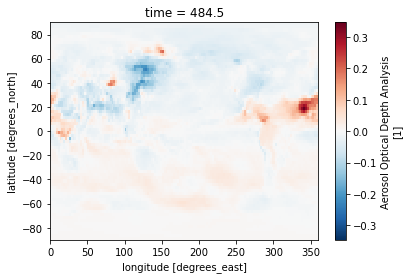

In [7]:
ds_aod.AODANA.plot()

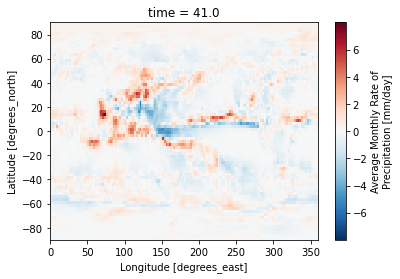

In [10]:
ds_pr.precip.plot()

# Degrees of Freedom

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom/49473949

In [26]:
def stdev(X):
    m = np.mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 / (len(Y) - 1))
    return(df)

# Domains

d1. Asian domain (10-50N, 50-150E)

d2. South Asia (10-30N, 60-100E)

d3. West Central India (15-25N, 70-85E)

d4. East Asia (20-40N, 100-140E)

d5. Yangzte River Valley (25-35N, 105-120E)

In [37]:
latd1s, latd1e, lond1s, lond1e = 10, 50, 50, 150
latd2s, latd2e, lond2s, lond2e = 10, 30, 60, 100
latd3s, latd3e, lond3s, lond3e = 15, 25, 70, 85
latd4s, latd4e, lond4s, lond4e = 20, 40, 100, 140
latd5s, latd5e, lond5s, lond5e = 25, 35, 105, 120

In [38]:
x = ds_aod.sel(latitude=slice(latd1s, latd1e)).AODANA.values.flatten()
y = ds_pr.sel(lat=slice(latd1s, latd1e)).precip.values.flatten()
dof_d1 = degreesOfFreedom(x, y)
pattern_corr = scipy.stats.pearsonr(x, y)
print("For domain d1 Degrees of freedom: ", dof_d1, " pattern correlation: ", pattern_corr[0], " p-value: ", pattern_corr[1])

For domain d1 Degrees of freedom:  2312.5214312610246  pattern correlation:  -0.12228599707002985  p-value:  3.893520668569451e-09


In [39]:
x = ds_aod.sel(latitude=slice(latd2s, latd2e)).AODANA.values.flatten()
y = ds_pr.sel(lat=slice(latd2s, latd2e)).precip.values.flatten()
dof_d2 = degreesOfFreedom(x, y)
pattern_corr = scipy.stats.pearsonr(x, y)
print("For domain d2 Degrees of freedom: ", dof_d2, " pattern correlation: ", pattern_corr[0], " p-value: ", pattern_corr[1])

For domain d2 Degrees of freedom:  1155.4437968252507  pattern correlation:  0.014733238875865817  p-value:  0.6173941210531376


In [40]:
x = ds_aod.sel(latitude=slice(latd3s, latd3e)).AODANA.values.flatten()
y = ds_pr.sel(lat=slice(latd3s, latd3e)).precip.values.flatten()
dof_d3 = degreesOfFreedom(x, y)
pattern_corr = scipy.stats.pearsonr(x, y)
print("For domain d3 Degrees of freedom: ", dof_d3, " pattern correlation: ", pattern_corr[0], " p-value: ", pattern_corr[1])

For domain d3 Degrees of freedom:  578.8769938985359  pattern correlation:  0.04346799922785351  p-value:  0.2976630119521465


In [41]:
x = ds_aod.sel(latitude=slice(latd4s, latd4e)).AODANA.values.flatten()
y = ds_pr.sel(lat=slice(latd4s, latd4e)).precip.values.flatten()
dof_d4 = degreesOfFreedom(x, y)
pattern_corr = scipy.stats.pearsonr(x, y)
print("For domain d4 Degrees of freedom: ", dof_d4, " pattern correlation: ", pattern_corr[0], " p-value: ", pattern_corr[1])

For domain d4 Degrees of freedom:  1156.3094132407402  pattern correlation:  -0.20449683135380875  p-value:  2.4261635556227888e-12


In [42]:
x = ds_aod.sel(latitude=slice(latd5s, latd5e)).AODANA.values.flatten()
y = ds_pr.sel(lat=slice(latd5s, latd5e)).precip.values.flatten()
dof_d5 = degreesOfFreedom(x, y)
pattern_corr = scipy.stats.pearsonr(x, y)
print("For domain d5 Degrees of freedom: ", dof_d5, " pattern correlation: ", pattern_corr[0], " p-value: ", pattern_corr[1])

For domain d5 Degrees of freedom:  576.3308357999422  pattern correlation:  -0.24225884432069728  p-value:  3.872824485723952e-09
